In [291]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path
import seaborn as sns

# Climate Change Analysis

### Import Data

In [292]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the GlobalTemperature.csv file from the Resources folder
global_temperature_df = pd.read_csv(Path("./Resources/GlobalTemperatures.csv"))

In [293]:
# Review the first and last five rows of the global_temperature_df DataFrame
display(global_temperature_df.head())
display(global_temperature_df.tail())

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


### Clean Data

In [294]:
# Format dt column as Datetime data format
global_temperature_df['time'] = pd.to_datetime(global_temperature_df['dt'], infer_datetime_format=True)

# Set time as index 
global_temperature_df = global_temperature_df.set_index('time')

In [295]:
# Drop unnecessary columns
global_temperature_df = global_temperature_df['LandAndOceanAverageTemperature'].dropna()

# Rename DataFrame columns so units show correctly in hvplot
global_temperature_df = pd.DataFrame({'temperature':global_temperature_df})

In [296]:
# Review the first 5 and last 5 rows the DataFrame
display(global_temperature_df.head())
display(global_temperature_df.tail())

,temperature
time,
1850-01-01,12.833
1850-02-01,13.588
1850-03-01,14.043
1850-04-01,14.667
1850-05-01,15.507


,temperature
time,
2015-08-01,17.589
2015-09-01,17.049
2015-10-01,16.290
2015-11-01,15.252
2015-12-01,14.774


### Analyze Data

In [297]:
# Plot Land and Ocean Daily Averages to get a visualization of the raw data.
global_temperature_df.hvplot(title = "Land and Ocean Daily Average Temperatures (1850 - 2016)",
                            xlabel = "Date",
                            ylabel = "Temperature (Celsius)")

:Curve   [time]   (temperature)

As seen from the following screenshot, seasons have more variation than the overall trend of land temperature.  Due to this, we will look at the mean average temperature per year, and use this information to evaluate overall trends. 

![A screenshot depicting the impact of seasons on overall trend analysis.](./Images/land_average_temp_no_average.PNG)

In [298]:
# After viewing the intial data and realizing season remove the ability to see general trends, we will resturucture the DataFrame to have an index of years rather than year-month.

# Create new_date column based off index
global_temperature_df['new_date'] = global_temperature_df.index

# Set new_date column to be year only
global_temperature_df['new_date'] = global_temperature_df['new_date'].dt.year

# Reset index
global_temperature_df = global_temperature_df.reset_index()

# Drop time column
global_temperature_df = global_temperature_df.drop(columns = ['time'])

# Rename columns
global_temperature_df.columns = ['temperature', 'year']

# Set new index with year column
global_temperature_df = global_temperature_df.set_index('year')

In [299]:
# Average values by year to acommodate for seasonal changes to get mean yearly temperatures
global_temperature_year_df = global_temperature_df.groupby(['year']).mean()

# Review the first 5 and last 5 rows of DataFrame
display(global_temperature_year_df.head())
display(global_temperature_year_df.tail())

,temperature
year,
1850,14.867167
1851,14.991833
1852,15.006500
1853,14.955167
1854,14.991000


,temperature
year,
2011,15.769500
2012,15.802333
2013,15.854417
2014,15.913000
2015,16.058583


In [300]:
# Review the length the DataFrame which corresponds to the number of years analyzed. 
print(f"The length of the land_global_temperature_year is {len(global_temperature_year_df.index)}.")

The length of the land_global_temperature_year is 166.


In [301]:
# Plot Land and Ocean Daily Averages to get a visualization of the raw data.
global_temperature_year_df.hvplot(title = "Land and Ocean Yearly Average Temperatures (1850 - 2016)",
                            xlabel = "Date",
                            ylabel = "Temperature (Celsius)")

:Curve   [year]   (temperature)

After further research into climate analysis, it was discovered that climate is not typically analyzed in average absolute values, but rather in what is know as "temperature anomalies".  A temperature anomoly is measured by the distance that a temperature deviates from the "normal average temperature".  The "normal average temperature" is the mean value of a temperature range that spans over atleast a 30 year period.  This distance from mean can be normalized to the standard deviation which is know as "Standardized Anomolies".  Standardized anomolies will be how we will analyze trends for our data.   

Different organizations use different normal average temperature timeframes; for example the World Meteorological Organization (WMO) uses 1918-2010, NASA uses 1951-1980 and NOAA uses data spanning over the entire 20th century.

For the sake of this analysis, we will use the same timeframe as NOAA (1900-01-01 to 2000-01-01) for our normal average temperature reference.   

In [302]:
# Extract the 20th century from the global_temperature_year_df to use as reference.  
normal_average_temperature = global_temperature_year_df.loc['1900':'1999']

# Review the first 5 and last 5 rows of DataFrame
display(normal_average_temperature.head())
display(normal_average_temperature.tail())

,temperature
year,
1900,15.143917
1901,15.073333
1902,14.958333
1903,14.836583
1904,14.810417


,temperature
year,
1995,15.637833
1996,15.524667
1997,15.713833
1998,15.826000
1999,15.600333


In [303]:
# Find the mean value and standard deviation of the normal_average_temperature DataFrame
mean = normal_average_temperature.mean()
std_dev = normal_average_temperature.std()

# Review the mean value and standard deviation
print("The mean value of the normal_average_temperature DataFrame is:")
print(f"{mean}")
print("\n")
print(f"The standard devation of the normal_average_temperature DataFrame is:")
print(f"{std_dev}")

The mean value of the normal_average_temperature DataFrame is:
temperature    15.236225
dtype: float64


The standard devation of the normal_average_temperature DataFrame is:
temperature    0.223864
dtype: float64


In [304]:
# Create a new DataFrame containing standardized anomolies normalized to the normal_average_temperature DataFrame.  
climate_standardized_anomoly = (global_temperature_year_df - mean)/std_dev

# Rename column in df
climate_standardized_anomoly = climate_standardized_anomoly.rename(columns={'temperature':'temperature_standardized_anomoly'})

# Review the first 5 and last 5 rows of DataFrame
display(climate_standardized_anomoly.head())
display(climate_standardized_anomoly.tail())

,temperature_standardized_anomoly
year,
1850,-1.648582
1851,-1.091697
1852,-1.026181
1853,-1.255487
1854,-1.095419


,temperature_standardized_anomoly
year,
2011,2.382138
2012,2.528804
2013,2.761460
2014,3.023152
2015,3.673472


In [305]:
# Plot Land and Ocean Standardized Anomolies to get a visualization of the normalized data.
climate_standardized_anomoly.hvplot(title = "Land and Ocean Standardized Temperature Anomolies (1850 - 2016)",
                                                                xlabel = "Date",
                                                                ylabel = "Standardized Anomolies")

:Curve   [year]   (temperature_standardized_anomoly)

As seen for the temperature analysis, there is a warming trend occuring that began to increase slightly around 1920 and then the trend of warming significantly increased around 1980.  The following imaget shows the generaly trend of warming in units of "Standard Devation": 

![A screenshot depicting the warming trend of earth in units of "Standard Devation".](./Images/standardized_temperature_anomolies.PNG)

When comparing this to a standard "Normal Distribution" curve, we can determine that this warming trend is very substantial and does not follow the rules of normal distribution probability.  For example, beginning in 2014 the temperature anomolies began to deviate by more than 3 standard devation units from the normal average temperature mean.  A normal distribution curve indicates that the "odds" of this ocurring are less than 0.1% and by the way the devations have been trending since 1980, it does not look like this warming trend will be slowing down.  

The following "Normal Distribution" curve is provided for context of this analyis.  It was obtained from Investopia and created by Julie Bang: 

![investopia_normal_distribution_curve](./Images/bell_curve.PNG)

This warming trend phenomenon not only has an impact on the temperature but also can cause great economic costs in the form of disaster, disease and agrictulture.  

In the following sections of this report, we will evaluate more in depth the occurrences of natural disasters (specifically extreme weather conditions in the United States) and whether or not the frequency of these events have increased similarly to the climate temperature.  

We will also evalute more in depth the overall trends in agriculture (specifically analyzing commoditie market pricing).  We want to analyze how specific commodities and their prices react to the general warming trends of the climate as well as taking into consideration the effects that extreme weather conditions may have on these products.  

At the end of this report, we will provide analysis on which commodities have faired the best through the warming trends of the last decade and what commodites may be a potential smart investment moving forward.

# Natural Disasters in the United States Analysis

### Import Data

In [306]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the us_disaster_declarations.csv from the Resources folder
us_disasters_df = pd.read_csv(Path("./Resources/us_disaster_declarations.csv"))

# Using the read_csv function and Path module, create a DataFrame 
# by importing the us_disaster_declarations.csv from the Resources folder
us_state_location_df = pd.read_csv(Path("./Resources/world_country_and_usa_states_latitude_and_longitude_values.csv"))

In [307]:
# Review the first and last five rows of the us_disaster_df DataFrame
display(us_disasters_df.head())
display(us_disasters_df.tail())

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
62592,EM-3574-LA,3574,LA,EM,2021-09-13T22:22:00Z,2021,Coastal Storm,Tropical Storm Nicholas,0,0,...,2021-09-12T12:00:00Z,NaN,NaN,22121,99121,West Baton Rouge (Parish),21101,d8dbe3f740b91ac17b35e49bc71fe22940905f62,2021-09-14T03:02:03Z,614010ab434e34d5ee03378a
62593,EM-3574-LA,3574,LA,EM,2021-09-13T22:22:00Z,2021,Coastal Storm,Tropical Storm Nicholas,0,0,...,2021-09-12T12:00:00Z,NaN,NaN,22125,99125,West Feliciana (Parish),21101,2b408677246d38fa2e20fc687a5b1fa1fb3bb324,2021-09-14T03:02:03Z,614010ab434e34d5ee03378d
62594,EM-3574-LA,3574,LA,EM,2021-09-13T22:22:00Z,2021,Coastal Storm,Tropical Storm Nicholas,0,0,...,2021-09-12T12:00:00Z,NaN,NaN,22123,99123,West Carroll (Parish),21101,6ca2c413f659d8f114e82d2bd8df07148fd4ef73,2021-09-14T03:02:03Z,614010ab434e34d5ee033790
62595,EM-3574-LA,3574,LA,EM,2021-09-13T22:22:00Z,2021,Coastal Storm,Tropical Storm Nicholas,0,0,...,2021-09-12T12:00:00Z,NaN,NaN,22127,99127,Winn (Parish),21101,b88598fa1adce7778c2fb295668281ea28920f5b,2021-09-14T03:02:03Z,614010ab434e34d5ee033794
62596,FM-5417-CA,5417,CA,FM,2021-09-23T21:00:00Z,2021,Fire,Fawn Fire,0,0,...,2021-09-23T18:00:00Z,NaN,NaN,6089,99089,Shasta (County),21107,486144c2913fbc43a15482ee7672b162d50f2715,2021-09-25T02:03:32Z,614e8374b7c535bbb1907259


In [308]:
# Review the first and last five rows of the us_disaster_df DataFrame
display(us_state_location_df.head())
display(us_state_location_df.tail())

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN
244,ZW,-19.015438,29.154857,Zimbabwe,NaN,NaN,NaN,NaN


### Clean Data

In [309]:
# Drop columns not relevant to our anlaysis
us_disasters_df = us_disasters_df.drop(columns = ['fema_declaration_string', 'ih_program_declared', 'ia_program_declared', 'declaration_title', 'pa_program_declared', 'hm_program_declared',
                                                 'incident_begin_date', 'incident_end_date', 'disaster_closeout_date', 'fips', 'place_code', 'hash', 'last_refresh', 'id', 'designated_area', 'declaration_type',
                                                 'fy_declared', 'declaration_request_number'])

In [310]:
# Review the first and last five rows of the us_disaster_df DataFrame
display(us_disasters_df.head())
display(us_disasters_df.tail())

,disaster_number,state,declaration_date,incident_type
0,1,GA,1953-05-02T00:00:00Z,Tornado
1,2,TX,1953-05-15T00:00:00Z,Tornado
2,3,LA,1953-05-29T00:00:00Z,Flood
3,4,MI,1953-06-02T00:00:00Z,Tornado
4,5,MT,1953-06-06T00:00:00Z,Flood


,disaster_number,state,declaration_date,incident_type
62592,3574,LA,2021-09-13T22:22:00Z,Coastal Storm
62593,3574,LA,2021-09-13T22:22:00Z,Coastal Storm
62594,3574,LA,2021-09-13T22:22:00Z,Coastal Storm
62595,3574,LA,2021-09-13T22:22:00Z,Coastal Storm
62596,5417,CA,2021-09-23T21:00:00Z,Fire


In [311]:
# Format declaration_date column as Datetime data format
us_disasters_df['year'] = pd.to_datetime(us_disasters_df['declaration_date'], infer_datetime_format=True)

# Format date to be year only
us_disasters_df['year'] = us_disasters_df['year'].dt.year

In [312]:
# Set time as index 
us_disasters_df = us_disasters_df.set_index('year')

In [313]:
# Drop unnecessary rows
us_disasters_df = us_disasters_df.dropna()
us_disasters_df = us_disasters_df.drop(columns = ['declaration_date'])

# Drop duplicate rows
us_disasters_df = us_disasters_df.drop_duplicates()

In [314]:
# Review the first 5 and last 5 rows the DataFrame
display(us_disasters_df.head())
display(us_disasters_df.tail())

,disaster_number,state,incident_type
year,,,
1953,1,GA,Tornado
1953,2,TX,Tornado
1953,3,LA,Flood
1953,4,MI,Tornado
1953,5,MT,Flood


,disaster_number,state,incident_type
year,,,
2021,4618,PA,Hurricane
2021,4619,CA,Fire
2021,4620,AZ,Flood
2021,3574,LA,Coastal Storm
2021,5417,CA,Fire


In [315]:
# Change column name to "state" to be merged later
us_state_location_df["state"] = us_state_location_df["usa_state_code"]

# Drop unnecessary rows
us_state_location_df = us_state_location_df.drop(columns = ['country_code', 'latitude', 'longitude', 'country', 'usa_state_code'])

# Drop empty rows
us_state_location_df = us_state_location_df.dropna()

In [316]:
display(us_state_location_df.head())
display(us_state_location_df.tail())

,usa_state_latitude,usa_state_longitude,usa_state,state
0,63.588753,-154.493062,Alaska,AK
1,32.318231,-86.902298,Alabama,AL
2,35.201050,-91.831833,Arkansas,AR
3,34.048928,-111.093731,Arizona,AZ
4,36.778261,-119.417932,California,CA


,usa_state_latitude,usa_state_longitude,usa_state,state
47,44.558803,-72.577841,Vermont,VT
48,47.751074,-120.740139,Washington,WA
49,43.784440,-88.787868,Wisconsin,WI
50,38.597626,-80.454903,West Virginia,WV
51,43.075968,-107.290284,Wyoming,WY


### Data Analysis

In [317]:
# Using the DataFrame
# group the information by "state" and count the data
number_of_disasters_by_state = us_disasters_df.groupby("state").count()
number_of_disasters_by_state['disaster_count'] = number_of_disasters_by_state['incident_type']
number_of_disasters_by_state = number_of_disasters_by_state.drop(columns = ['disaster_number', 'incident_type'])

# Sort the DataFrame by "count"
number_of_disasters_by_state = number_of_disasters_by_state.sort_values("disaster_count")


# Review the first five rows resulting DataFrame
number_of_disasters_by_state.head()

,disaster_count
state,
PW,1
MH,7
AS,16
GU,19
FM,21


In [318]:
# Create a bar chart of the `number_of_disasters_by_state` DataFrame
number_of_disasters_by_state.hvplot.bar(
    rot=90, 
    title = "Number of Total Disasters Per State from 1953-05-02 through 2021-09-23"
).opts(yformatter='%.0f')

:Bars   [state]   (disaster_count)

Analyzing data by state appears to show that states with higher agricultural output tend to have a higher frequency of extreme weather events. Due to this, we will explore a more in depth geographical visualtion. 

In [319]:
# Merge the DataFrame with disaster data and DataFrame with location data
merged_df = number_of_disasters_by_state.merge(us_state_location_df, how='inner', on='state')

# View the first 5 rows of the df
merged_df.head()

,state,disaster_count,usa_state_latitude,usa_state_longitude,usa_state
0,DC,23,38.905985,-77.033418,District of Columbia
1,DE,24,38.910832,-75.527670,Delaware
2,RI,26,41.580095,-71.477429,Rhode Island
3,MD,37,39.045755,-76.641271,Maryland
4,SC,38,33.836081,-81.163725,South Carolina


In [320]:
# Using hvPlot, visualize the number of disasters by location
disaster_location_plot = merged_df.hvplot.points(
    'usa_state_longitude',
    'usa_state_latitude',
    geo = True, 
    size = 'disaster_count', 
    color = 'disaster_count',
    alpha=1,
    scale = 1,
    tiles = 'OSM',
    frame_width = 700, 
    frame_height = 500,
    title = "Number of Diasters By USA Location - 1953-05-02 through 2021-09-03"
    )

disaster_location_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [usa_state_longitude,usa_state_latitude]   (disaster_count)

In [321]:
# Using the DataFrame
# group the information by "year" and count each event
number_of_disasters_by_year = us_disasters_df.groupby("year").count()
number_of_disasters_by_year['disaster_count'] = number_of_disasters_by_year['incident_type']

# Drop unnecessary columns
number_of_disasters_by_year = number_of_disasters_by_year.drop(columns = ['disaster_number', 'incident_type', 'state'])

# Drop 2021 row because this year has incomplete data
number_of_disasters_by_year = number_of_disasters_by_year.drop(number_of_disasters_by_year.index[-1])

# Review the first five rows resulting DataFrame
display(number_of_disasters_by_year.head())
display(number_of_disasters_by_year.tail())

,disaster_count
year,
1953,13
1954,17
1955,18
1956,16
1957,16


,disaster_count
year,
2016,103
2017,137
2018,124
2019,101
2020,312


In [322]:
# Plot Land and Ocean Daily Averages to get a visualization of the raw data.
number_of_disasters_by_year.hvplot(title = "USA Natural Diaster Absolute Count (1950 - 2020)",
                            xlabel = "Year",
                            ylabel = "# of Total Disasters",
                            rot = 90)

:Curve   [year]   (disaster_count)

In [323]:
# Add a new "Date" column to be utilized for linear regression line
disaster_by_year_lmplot = number_of_disasters_by_year

# Set index to "Date" column so we have a column of the dates to be utlized in our linear regression plot 
disaster_by_year_lmplot["Year"] = disaster_by_year_lmplot.index

# Drop unnecessary columns
number_of_disasters_by_year = number_of_disasters_by_year.drop(columns = ['Year'])

# Rename disaster_count column for linear regression plot
disaster_by_year_lmplot = disaster_by_year_lmplot.rename(columns={"disaster_count":"# of Disasters"})

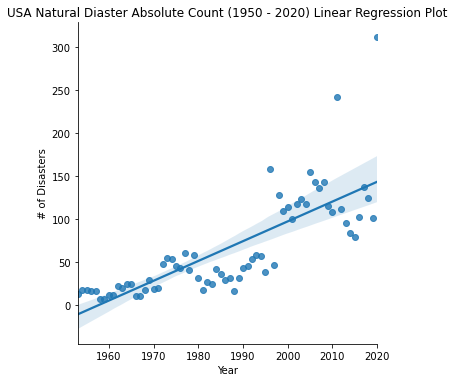

In [324]:
# Use the new seaborn library to plot a scatter plot and line of best fit representing the USA Natural Disasters absolute count
sns.lmplot(x="Year", y = "# of Disasters", data=disaster_by_year_lmplot).set(title = "USA Natural Diaster Absolute Count (1950 - 2020) Linear Regression Plot");

In order to stay consistent with the climate temperature analysis, we will also evaluate the natural disaster count in standard devaitaions from the mean.  This will allow for a more equivalent comparison between the climate analysis as well as the disaster analysis.  For the normal average disaster dataframe, we will use the entire dataset of 1953 to 2020.

In [325]:
# Find the mean value and standard deviation of the number_of_disasters_by_year DataFrame
mean = number_of_disasters_by_year.mean()
std_dev = number_of_disasters_by_year.std()

# Review the mean value and standard deviation
print("The mean value of the number_of_disasters_by_year DataFrame is:")
print(f"{mean}")
print("\n")
print(f"The standard devation of the number_of_disasters_by_year DataFrame is:")
print(f"{std_dev}")

The mean value of the number_of_disasters_by_year DataFrame is:
disaster_count    66.264706
dtype: float64


The standard devation of the number_of_disasters_by_year DataFrame is:
disaster_count    58.244113
dtype: float64


In [326]:
# Create a new DataFrame containing standardized anomolies normalized to the normal_average_temperature DataFrame.  
disaster_standardized_anomoly = (number_of_disasters_by_year - mean)/std_dev

# Rename column in df
disaster_standardized_anomoly = disaster_standardized_anomoly.rename(columns={'disaster_count':'disaster_standardized_anomoly'})

# Review the first 5 and last 5 rows of DataFrame
display(disaster_standardized_anomoly.head())
display(disaster_standardized_anomoly.tail())

,disaster_standardized_anomoly
year,
1953,-0.914508
1954,-0.845832
1955,-0.828662
1956,-0.863001
1957,-0.863001


,disaster_standardized_anomoly
year,
2016,0.630713
2017,1.214463
2018,0.991264
2019,0.596374
2020,4.219058


In [327]:
# Plot USA Natural Disaster Counts Standardized Anomolies to get a visualization of the normalized data.
disaster_standardized_anomoly.hvplot(title = "USA Natural Disaster Count Standardized Anomolies (1950 - 2020)",
                                                                        xlabel = "Date",
                                                                        ylabel = "Standardized Anomolies")

:Curve   [year]   (disaster_standardized_anomoly)

In [328]:
# Compose an overlay plot of temperature anomolies and disaster anomolies
climate_standardized_anomoly.hvplot(title = "Standardized Temperature Trends vs Standardized Disasters Trends", ylabel = "Standardized Anomolies", xlabel = "Year", label = "Temperature Standardized Anomolies") * disaster_standardized_anomoly.hvplot(label = "Disaster Standardized Anomolies")

:Overlay
   .Curve.Temperature_Standardized_Anomolies :Curve   [year]   (temperature_standardized_anomoly)
   .Curve.Disaster_Standardized_Anomolies    :Curve   [year]   (disaster_standardized_anomoly)

A overlay of temperature anomolies vs USA natural disaster anomolies from 1960 onwards can be seen in the following screenshot: 

![side_by_side_of_temp_vs_disaster](./Images/temp_vs_disaster.PNG)

It can be seen that although disasters seems to be more sparatic in it's anomolies when compared temperature that there is an upward trend in both of the datasets analyzed.  Because the disaster dataset is smaller, it is important to note that the earlier data could provide us with more insights into the comparisons, but for now we will have to work with the information at hand.  

Going back to review the normal distribution curve, again we can determine that this disaster trend is very substantial and does not follow what you would expect from normal distribution probability.  For example, in 2020 the disaster anomolies deviate by more than 4 standard devation units from the normal average disaster mean.  A normal distribution curve indicates that the "odds" of this ocurring are less than 0.1% and by the way the devations have been trending since 1990, it appears that this trend may be on the increase. 

![investopia_normal_distribution_curve](./Images/bell_curve.PNG)

Now that we have an idea of the general trends of climate and weather as well as an anlaysis of disaster trends sampled for the USA, we can begin to look into commodity informtion and see if we can make long term investing decisions assuming these trends are to continue.  

# Commodity Price Analysis

In [329]:
# Create functions to import and create DataFrame as well as to clean multiple commoditie .csv files of the same format

# Import .csv file
def import_commodity(csv_path):
    name_df = pd.read_csv(Path(csv_path))
    return name_df
    
# Clean new commodity DataFrame
# RegionID defines that we want analyze the entire USA
# CategoryID indicates that we want to evaluate "Supporting Information" which includes the "Price"
# Item indicatees that we want to specifically evaluate "Price"
def clean_commodity(name_df):
    name_df = name_df[['Year', 'UnitsId', 'RegionId', 'Value', 'CategoryId', 'Item']]
    name_df = name_df.set_index('Year')
    name_price_df = name_df.loc[(name_df['RegionId'] == 10) & (name_df['CategoryId'] == 6) & (name_df['Item'] == 'Price')]
    name_price_df = name_price_df['Value']  
    name_price_df = name_price_df.groupby(name_price_df.index).mean()
    return name_price_df

In [344]:
# Using the created functions, import and clean the following commodities. 
# Review the first five and last five rows to view data range
barley_df = import_commodity('./Resources/BarleyCostReturn.csv')
barley_price_df = clean_commodity(barley_df)

display(barley_price_df.head())
display(barley_price_df.tail())

Year
2003    2.88
2004    2.67
2005    2.54
2006    2.64
2007    3.46
Name: Value, dtype: float64

Year
2016    4.73
2017    4.45
2018    4.48
2019    4.67
2020    4.48
Name: Value, dtype: float64

In [345]:
# Using the created functions, import and clean the following commodities. 
# Review the first five and last five rows to view data range
corn_df = import_commodity('./Resources/CornCostReturn.csv')
corn_price_df = clean_commodity(corn_df)

display(corn_price_df.head())
display(corn_price_df.tail())

Year
1996    2.82
1997    2.52
1998    1.91
1999    1.69
2000    1.77
Name: Value, dtype: float64

Year
2016    3.29
2017    3.25
2018    3.42
2019    3.83
2020    3.61
Name: Value, dtype: float64

In [346]:
# Using the created functions, import and clean the following commodities. 
# Review the first five and last five rows to view data range
cotton_df = import_commodity('./Resources/CottonCostReturn.csv')
cotton_price_df = clean_commodity(cotton_df)

display(cotton_price_df.head())
display(cotton_price_df.tail())

Year
1997    0.69
1998    0.64
1999    0.47
2000    0.57
2001    0.35
Name: Value, dtype: float64

Year
2016    0.67
2017    0.69
2018    0.76
2019    0.61
2020    0.63
Name: Value, dtype: float64

In [347]:
# Using the created functions, import and clean the following commodities. 
# Review the first five and last five rows to view data range
oats_df = import_commodity('./Resources/OatsCostReturn.csv')
oats_price_df = clean_commodity(oats_df)

display(oats_price_df.head())
display(oats_price_df.tail())

Year
2005    1.49
2006    1.88
2007    2.45
2008    3.69
2009    2.39
Name: Value, dtype: float64

Year
2016    1.93
2017    2.48
2018    2.65
2019    3.05
2020    2.76
Name: Value, dtype: float64

In [348]:
# Using the created functions, import and clean the following commodities. 
# Review the first five and last five rows to view data range
sorghum_df = import_commodity('./Resources/SorghumCostReturn.csv')
sorghum_price_df = clean_commodity(sorghum_df)

display(sorghum_price_df.head())
display(sorghum_price_df.tail())

Year
1995    2.75
1996    2.70
1997    2.29
1998    2.03
1999    1.79
Name: Value, dtype: float64

Year
2016    2.74
2017    3.17
2018    3.23
2019    3.32
2020    4.36
Name: Value, dtype: float64

In [349]:
# Using the created functions, import and clean the following commodities. 
# Review the first five and last five rows to view data range
peanuts_df = import_commodity('./Resources/PeanutsCostReturn.csv')
peanuts_price_df = clean_commodity(peanuts_df)

display(peanuts_price_df.head())
display(peanuts_price_df.tail())

Year
1995    0.29
1996    0.26
1997    0.26
1998    0.26
1999    0.26
Name: Value, dtype: float64

Year
2016    0.20
2017    0.23
2018    0.22
2019    0.21
2020    0.22
Name: Value, dtype: float64

In [350]:
# Using the created functions, import and clean the following commodities. 
# Review the first five and last five rows to view data range
soybeans_df = import_commodity('./Resources/SoybeansCostReturn.csv')
soybeans_price_df = clean_commodity(soybeans_df)

display(soybeans_price_df.head())
display(soybeans_price_df.tail())

Year
1997    6.54
1998    5.19
1999    4.45
2000    4.45
2001    4.15
Name: Value, dtype: float64

Year
2016    9.46
2017    9.28
2018    8.61
2019    8.61
2020    9.67
Name: Value, dtype: float64

In [351]:
# Using the created functions, import and clean the following commodities. 
# Review the first five and last five rows to view data range
wheat_df = import_commodity('./Resources/WheatCostReturn.csv')
wheat_price_df = clean_commodity(wheat_df)

display(wheat_price_df.head())
display(wheat_price_df.tail())

Year
1998    2.68
1999    2.48
2000    2.46
2001    2.76
2002    3.28
Name: Value, dtype: float64

Year
2016    3.93
2017    4.80
2018    5.20
2019    4.58
2020    4.61
Name: Value, dtype: float64

In [359]:
# Combine the individual commoditie DataFrames
combined_commidity_df = pd.concat([barley_price_df, corn_price_df, cotton_price_df, oats_price_df, sorghum_price_df, peanuts_price_df, soybeans_price_df, wheat_price_df], axis="columns")

# Rename the columsn
combined_commidity_df.columns = ['barley', 'corn', 'cotton', 'oats', 'sorghum', 'peanuts', 'soybeans', 'wheat']

# Rename the index to match the previous DataFrames
combined_commidity_df.index.names = ['year']

# Review the entire commodity DataFrame
combined_commidity_df.head(30)

,barley,corn,cotton,oats,sorghum,peanuts,soybeans,wheat
year,,,,,,,,
1995,NaN,NaN,NaN,NaN,2.75,0.29,NaN,NaN
1996,NaN,2.82,NaN,NaN,2.70,0.26,NaN,NaN
1997,NaN,2.52,0.69,NaN,2.29,0.26,6.54,NaN
1998,NaN,1.91,0.64,NaN,2.03,0.26,5.19,2.68
1999,NaN,1.69,0.47,NaN,1.79,0.26,4.45,2.48
2000,NaN,1.77,0.57,NaN,2.11,0.27,4.45,2.46
2001,NaN,1.84,0.35,NaN,2.47,0.23,4.15,2.76
2002,NaN,2.32,0.42,NaN,2.89,0.19,5.20,3.28
2003,2.88,2.13,0.66,NaN,2.25,0.18,6.56,3.11


In [354]:
# Plot absolute pricing data for the commodites
combined_commidity_df.hvplot(title = "Commodity Pricing Per Unit Sold", ylabel = "Price/Unit", xlabel = "Year")

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [357]:
# Create a DataFrame containing yearly percent change for each commodity
commodities_pct_change = combined_commidity_df.pct_change()

# Plot yearly percent change
commodities_pct_change.hvplot(title = "Yearly Percent Change in Commodity Pricing", ylabel = "Percent Change", xlabel = "Year")

:NdOverlay   [Variable]
   :Curve   [year]   (value)

In [358]:
# Create a DataFrame containing cumulative product of percent change for each commodity
commodities_cum_product = (1 + commodities_pct_change).cumprod()
commodities_cum_product = commodities_cum_product - 1

# Plot yearly cumalitive product
commodities_cum_product.hvplot(title = "Cumulative Percent Change in Commodity Pricing", ylabel = "Percent Change", xlabel = "Year")

:NdOverlay   [Variable]
   :Curve   [year]   (value)

Based off the absolute pricing, yearly percent change and cumulative percent change plots, it is difficult to see any general trends.  Although general trends are difficult to see, there are spikes pricing in 2008 and 2012 that garner some attention.  

Looking into the spike and following crash in 2008, we can actually find that much like the housing markets, there was a commoditie bubble being bolstered by speculative derivative trading in the commodity markets.  To add insult to injury, the commodity bubble burst shortly after the housing market recession which caused additioal finanical loss for the world.  This commodity bubble was mainly due to oil which is not analyzed in this project but you can see that other commodities were still affected. 

We can also see that there was a spike and following crash in 2012.  This is said to be due to the fact that the Chinese market demand for commodites was lessening over this time period resulting in a overall drop in demand, and therefore pricing.  

In the next section, we will begin to evaluate correlations between climate (temperature), natural disasters and commoditie pricing.

# Conclusion

In [365]:
# We will begin by combining absolute data into a single DataFrame
all_combined_df = pd.concat([global_temperature_year_df, number_of_disasters_by_year, combined_commidity_df], axis="columns")

# Review the first 10 and last 10 rows of DataFrame
display(all_combined_df.head(10))
display(all_combined_df.tail(10))

,temperature,disaster_count,barley,corn,cotton,oats,sorghum,peanuts,soybeans,wheat
year,,,,,,,,,,
1850,14.867167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,14.991833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,15.006500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,14.955167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,14.991000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1855,15.021083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1856,14.879333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1857,14.758250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1858,14.881500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,temperature,disaster_count,barley,corn,cotton,oats,sorghum,peanuts,soybeans,wheat
year,,,,,,,,,,
2011,15.769500,242.0,5.19,5.73,0.96,3.58,6.02,0.28,11.94,7.35
2012,15.802333,112.0,6.24,6.79,0.71,3.90,6.63,0.34,14.21,7.58
2013,15.854417,95.0,5.99,4.61,0.82,4.28,4.26,0.26,13.28,7.09
2014,15.913000,84.0,5.44,3.54,0.68,4.01,3.52,0.21,10.88,6.44
2015,16.058583,79.0,5.31,3.66,0.61,2.21,3.57,0.19,8.97,5.12
2016,NaN,103.0,4.73,3.29,0.67,1.93,2.74,0.20,9.46,3.93
2017,NaN,137.0,4.45,3.25,0.69,2.48,3.17,0.23,9.28,4.80
2018,NaN,124.0,4.48,3.42,0.76,2.65,3.23,0.22,8.61,5.20
2019,NaN,101.0,4.67,3.83,0.61,3.05,3.32,0.21,8.61,4.58


In [367]:
# Use the `pct_change` function to calculate yearly changes for each dataset
# Note: We are not dropping NA values to avoid losing information
daily_returns = all_combined_df.pct_change()
daily_returns.head()

,temperature,disaster_count,barley,corn,cotton,oats,sorghum,peanuts,soybeans,wheat
year,,,,,,,,,,
1850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1851,0.008385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1852,0.000978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,-0.003421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,0.002396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [369]:
# Use the `corr` function to calculate correlation for each commoditie vs temperature and disaster numbesr
correlation = daily_returns.corr()
correlation

,temperature,disaster_count,barley,corn,cotton,oats,sorghum,peanuts,soybeans,wheat
temperature,1.000000,-0.165050,-0.574292,-0.357644,-0.039919,-0.892673,-0.191678,-0.343637,-0.242455,-0.463925
disaster_count,-0.165050,1.000000,0.045008,-0.089327,0.126361,0.178688,0.122419,0.049414,0.056825,0.254944
barley,-0.574292,0.045008,1.000000,0.645209,0.062801,0.742270,0.318648,0.448583,0.804315,0.781409
corn,-0.357644,-0.089327,0.645209,1.000000,0.153599,0.589507,0.810788,0.390066,0.590498,0.699039
cotton,-0.039919,0.126361,0.062801,0.153599,1.000000,0.201409,0.115033,0.035751,0.517741,0.085882
oats,-0.892673,0.178688,0.742270,0.589507,0.201409,1.000000,0.437500,0.451267,0.659574,0.919036
sorghum,-0.191678,0.122419,0.318648,0.810788,0.115033,0.437500,1.000000,0.275048,0.342767,0.564649
peanuts,-0.343637,0.049414,0.448583,0.390066,0.035751,0.451267,0.275048,1.000000,0.361970,0.398384
soybeans,-0.242455,0.056825,0.804315,0.590498,0.517741,0.659574,0.342767,0.361970,1.000000,0.561650
wheat,-0.463925,0.254944,0.781409,0.699039,0.085882,0.919036,0.564649,0.398384,0.561650,1.000000
